In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [68]:
feature = pd.read_csv('../ML-projects/retails/Features.csv',parse_dates = True)
store = pd.read_csv('../ML-projects/retails/stores.csv',parse_dates = True)
sale = pd.read_csv('../ML-projects/retails/sales.csv',parse_dates = True)

In [3]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 711.9+ KB


In [4]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [5]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [6]:
sale.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
5,1,1,12/03/2010,21043.39,False
6,1,1,19/03/2010,22136.64,False
7,1,1,26/03/2010,26229.21,False
8,1,1,02/04/2010,57258.43,False
9,1,1,09/04/2010,42960.91,False


In [7]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
top_sale = sale.groupby(['Store']).mean()['Weekly_Sales'].max()
print("Top avarage sale is {}".format(round(top_sale)))

Top avarage sale is 29508.0


In [9]:
poor_sale = sale.groupby(['Store']).mean()['Weekly_Sales'].min()
print("Poor avarage sale is {}".format(round(poor_sale)))

Poor avarage sale is 5053.0


In [10]:
top_store_sale = sale.groupby(['Store']).mean()['Weekly_Sales'][sale.groupby(['Store']).mean()['Weekly_Sales'] == 29508.301591932617]
print("Top store's avarage sale is {}".format(top_store_sale.index[0]))

Top store's avarage sale is 20


In [11]:
# avg_sale = pd.DataFrame(sale.groupby(['Store']).mean()['Weekly_Sales'])
avg_sale = pd.DataFrame(sale.groupby(['Store']).mean()['Weekly_Sales'])
# sale.groupby(['Store']).mean()['Weekly_Sales']
avg_sale.reset_index(inplace = True)

In [13]:
store_avg_sale = pd.merge(left = store,right = avg_sale,on = 'Store')

In [15]:
store_avg_sale.head(3)

,Store,Type,Size,Weekly_Sales
0,1,A,151315,21710.543621
1,2,A,202307,26898.070031
2,3,B,37392,6373.033983


In [16]:
type_sale = store_avg_sale.groupby('Type').mean()['Weekly_Sales']

In [48]:
type_sale

Type
A    19626.236877
B    12087.378865
C     9575.247543
Name: Weekly_Sales, dtype: float64

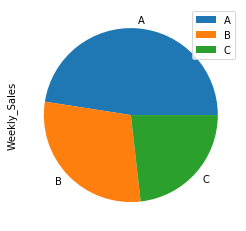

In [55]:
type_sale.plot(kind = 'pie')
plt.legend(type_sale.index)

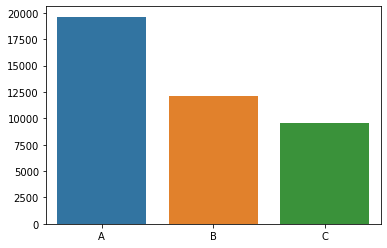

In [56]:
sns.barplot(x = ['A','B','C'],y = type_sale.values)

In [57]:
sale.head(6)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
5,1,1,12/03/2010,21043.39,False


In [69]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
